# Libraries

In [40]:

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [41]:
df=pd.read_excel('/content/vgsales_modellling.xlsx')
df.head()

,name,publisher,developer,vgchartz_score,critic_score,user_score,total_sales,na_sales,pal_sales,jp_sales,...,genre_Racing,genre_Role Playing,genre_Sandbox,genre_Shooter,genre_Simulation,genre_Sports,genre_Strategy,platform_XBOX,platform_PLAYSTATION,platform_OTHER
0,Mario Party: Star Rush,Nintendo,"Nd Cube Co., Ltd.",0.0,6.2,0.0,870000.0,250000.0,370000.0,200000.0,...,0,0,0,0,0,0,0,0,0,1
1,Knowledge is Power,Sony Interactive Entertainment,Wish Studio,0.0,0.0,0.0,610000.0,50000.0,470000.0,0.0,...,0,0,0,0,0,0,0,0,1,0
2,Animal Crossing: Amiibo Festival,Nintendo,"Nd Cube Co., Ltd.",0.0,4.8,0.0,490000.0,230000.0,120000.0,100000.0,...,0,0,0,0,0,0,0,0,0,0
3,Momotaro Dentetsu 2017: Tachiagare Nippon!!,Nintendo,Valhalla Game Studios,0.0,0.0,0.0,400000.0,0.0,0.0,400000.0,...,0,0,0,0,0,0,0,0,0,1
4,WipeOut 3 The Game,Activision,Behaviour Interactive,0.0,0.0,0.0,400000.0,360000.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
df.dtypes

name                              object
publisher                         object
developer                         object
vgchartz_score                   float64
critic_score                     float64
user_score                       float64
total_sales                      float64
na_sales                         float64
pal_sales                        float64
jp_sales                         float64
other_sales                      float64
release_date              datetime64[ns]
last_update               datetime64[ns]
release_month                      int64
release_year                       int64
release_day_of_week                int64
release_day                        int64
platform_NS                        int64
genre_Action                       int64
genre_Action-Adventure             int64
genre_Adventure                    int64
genre_Fighting                     int64
genre_MMO                          int64
genre_Music                        int64
genre_Party     

In [43]:
df.date=pd.to_datetime(df.release_date)
df['release_month']=df['release_date'].apply(lambda x: x.to_pydatetime().month)
df['release_year']=df['release_date'].apply(lambda x: x.to_pydatetime().year)
df['release_day_of_week']=df['release_date'].apply(lambda x: x.to_pydatetime().weekday())
df['release_day']=df['release_date'].apply(lambda x: x.to_pydatetime().day)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [44]:
df=df.copy()
df=pd.concat([df, pd.get_dummies(df['release_month'])], axis=1);

In [45]:
df.rename(columns={1:'Jan', 2:'Feb', 3: 'Mar', 4: 'Apr',  5: 'May',  6: 'Jun',  7: 'Jul',  8: 'Aug', 9: 'Sept', 10: 'Oct', 11: 'Nov', 12: 'Dec' }, inplace=True)


In [46]:
df=df.drop(['publisher','developer','last_update','release_date','release_month','na_sales','pal_sales','jp_sales','other_sales'], axis=1)

In [47]:
df.dtypes==object

name                       True
vgchartz_score            False
critic_score              False
user_score                False
total_sales               False
release_year              False
release_day_of_week       False
release_day               False
platform_NS               False
genre_Action              False
genre_Action-Adventure    False
genre_Adventure           False
genre_Fighting            False
genre_MMO                 False
genre_Music               False
genre_Party               False
genre_Platform            False
genre_Puzzle              False
genre_Racing              False
genre_Role Playing        False
genre_Sandbox             False
genre_Shooter             False
genre_Simulation          False
genre_Sports              False
genre_Strategy            False
platform_XBOX             False
platform_PLAYSTATION      False
platform_OTHER            False
Jan                       False
Feb                       False
Mar                       False
Apr     

In [48]:
df.shape

(15775, 40)

In [49]:
df.head()

,name,vgchartz_score,critic_score,user_score,total_sales,release_year,release_day_of_week,release_day,platform_NS,genre_Action,...,Mar,Apr,May,Jun,Jul,Aug,Sept,Oct,Nov,Dec
0,Mario Party: Star Rush,0.0,6.2,0.0,870000.0,2016,4,4,0,0,...,0,0,0,0,0,0,0,0,1,0
1,Knowledge is Power,0.0,0.0,0.0,610000.0,2017,1,24,0,0,...,0,0,0,0,0,0,0,1,0,0
2,Animal Crossing: Amiibo Festival,0.0,4.8,0.0,490000.0,2015,4,13,1,0,...,0,0,0,0,0,0,0,0,1,0
3,Momotaro Dentetsu 2017: Tachiagare Nippon!!,0.0,0.0,0.0,400000.0,2016,3,22,0,0,...,0,0,0,0,0,0,0,0,0,1
4,WipeOut 3 The Game,0.0,0.0,0.0,400000.0,2012,1,25,1,0,...,0,0,0,0,0,0,1,0,0,0


In [50]:
df['total_sales'].describe()

count    1.577500e+04
mean     4.044951e+05
std      8.801711e+05
min      1.000000e+04
25%      5.000000e+04
50%      1.500000e+05
75%      4.100000e+05
max      2.033000e+07
Name: total_sales, dtype: float64

#Baseline Model

In [51]:
df['total_sales'].mean()

404495.08716323297

Concusion: This is the baseline which I can try and beat my other models. This result means that if I just used the average to predict my RMSE score would be just under $404,000.

#Setting predictor ad target variables

In [52]:
features=[col for col in df._get_numeric_data().columns if col != 'total_sales']

X = df[features]
y = df['total_sales']

#Train/Test split

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

In [54]:
print('Training Features Shape', X_train.shape)
print('Testing Features Shape', y_train.shape)
print('Training Labels Shape', X_test.shape)
print('Testing Labels Shape', y_test.shape)

Training Features Shape (11831, 38)
Testing Features Shape (11831,)
Training Labels Shape (3944, 38)
Testing Labels Shape (3944,)


#Preprocessing

In [55]:
ss= StandardScaler(with_mean=False)
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)


#Modelling

Instantiate the models

In [56]:
lr=LinearRegression()

In [57]:
lasso=LassoCV(n_alphas=200)


In [58]:
ridge = RidgeCV(alphas=np.linspace(.1, 10, 100))

In [59]:
rf = RandomForestRegressor(n_estimators = 1000, random_state=42)

#Cross Validation

In [60]:
lr_scores=cross_val_score(lr, X_train, y_train, cv=5)
lr_scores.mean()

-4.637749648601308e+18

In [61]:
lasso_scores = cross_val_score(lasso, X_train, y_train, cv=5)
lasso_scores.mean()

0.13366351333245796

In [62]:
ridge_scores = cross_val_score(ridge, X_train, y_train, cv=5)
ridge_scores.mean()

0.1338237210397014

#Fit to Model

In [65]:
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [67]:
rf.score(X_train, y_train)

0.8867074890027792

In [69]:
rf.score(X_test, y_test)

0.3893145874712024

#Interpreting the score

In [70]:
pred = rf.predict(X_test)

In [71]:
r2_score(y_test, pred)

0.3893145874712024

In [73]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, pred)
rmse = (mean_squared_error(y_test, pred))**0.5
print('The root mean squared error of the model is' +str(rmse))

The root mean squared error of the model is658950.4219617307


With a RMSE score of 660,000, whats this means is that our model's prediction is on average off by $660,000 in terms of predicting the total sales volume's price.

#Conclusion & Findings

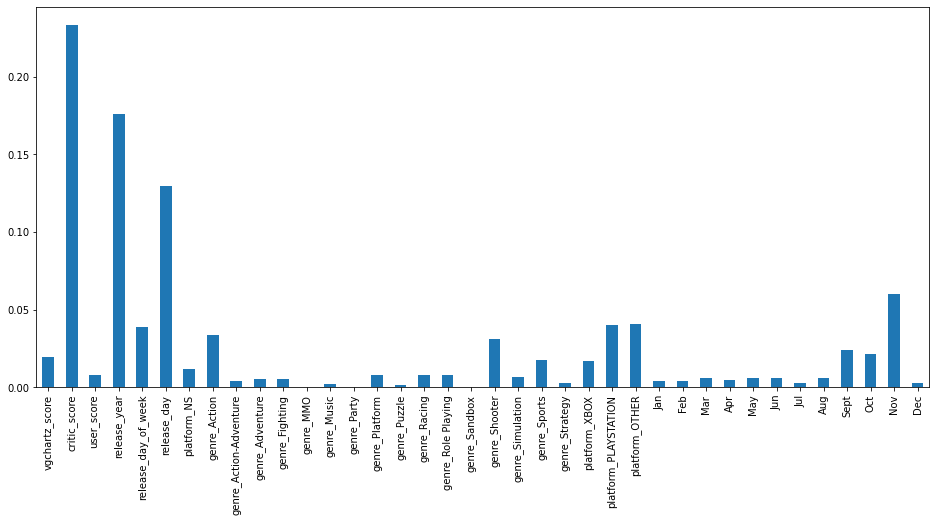

In [74]:
pd.Series(rf.feature_importances_, index=features).plot.bar(figsize=(16,7))

In [79]:
coef_df = pd.DataFrame([rf.feature_importances_, X.columns], index=['Coefficients', 'Features']).T
coef_df = coef_df.set_index('Features')
coef_df['Coefficients'] = np.abs(coef_df['Coefficients'])
coef_df = coef_df.sort_values(by='Coefficients', ascending=False)
coef_df.head(10)

,Coefficients
Features,
critic_score,0.233157
release_year,0.175985
release_day,0.129662
Nov,0.060228
platform_OTHER,0.040596
platform_PLAYSTATION,0.040353
release_day_of_week,0.038732
genre_Action,0.033762
genre_Shooter,0.03125


Text(0.5, 0, 'Strength of Predictor')

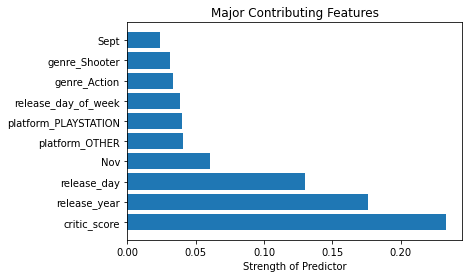

In [80]:
plt.barh(y=coef_df.index[:10], width=coef_df['Coefficients'][0:10]);
plt.title('Major Contributing Features')
plt.xlabel('Strength of Predictor')

#Conclusion



The important features that affect overall total sales are:
* Critic_score
* Release_of_month(November)
* Platform(Playstation)

Through this model, we are able to predict the total sales with RMSE score of 660,000, what this means is that our model's prediction is on average off by $660,000. Given the better performance of the model, it is clear that we achived the objectiveof our project succesfully.

The  ultimatee outcome will be, with the details of the total salesprediction for the sales volume, I will use the data to convice stakeholders of the company to set an amount of budget for any new game development, focus on building games based on the Playstation and also allocating more marketing strategies and ensuring that the critics give a good score for our games.


#Recommendations

Additional outside research found that video game downloadable contents and microsanctions to drive $4 billion in sales alone. Therefore much consideration should be made to increase content with new product with new updates and additional features in the game. This wil greatly increase the sales revenue of the game developed as well.

Consideration for future game development is that we can create a game which players get to play on thier main tv game consoles and at the same time have a mobile game app which is linked. So in this way, we are able to capture the upcoming trend of mobile gaming and ride the wave on the potential revenues that possible to explode in the years to come. 